In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [64]:
path_sf = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\IBGE\BR_RG_Imediatas_2023\BR_RG_Imediatas_2023.shp'
geo_df = gpd.read_file(path_sf)
geo_df = geo_df.loc[geo_df['NM_UF'] == 'São Paulo']

In [65]:
dir_path = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Results'
name_path = 'results.csv'
complete_path = os.path.join(dir_path, name_path)

In [66]:
dir = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Dados Gerados Mestrado\Auxiliar'
df_dist_ZD_PA = pd.read_csv(os.path.join(dir, 'df_dist_ZD_PA.csv'))

In [67]:
def criar_excel(df, criar_novo=0, path=rf"C:\Users\rpafe\Desktop\dados_exportados.xlsx"):
    # Se criar_novo for 1 ou o arquivo não existir, cria um novo arquivo
    if criar_novo == 1 or not os.path.exists(path):
        mode = "w"
    else:
        mode = "a"

    with pd.ExcelWriter(path, mode=mode) as writer:
        # Obtendo o número da última sheet e incrementando (somente no modo 'a')
        if mode == "a":
            numsht = len(writer.book.sheetnames) + 1 if writer.book.sheetnames else 1
        else:
            numsht = 1  # Começa do primeiro se for um novo arquivo

        df.to_excel(writer, sheet_name=f"Sheet{numsht}")

    print(f"Arquivo Excel atualizado! {'Novo arquivo criado.' if criar_novo == 1 else 'Nova sheet adicionada.'}")


In [68]:
df = pd.read_csv(complete_path, encoding='latin1', sep=',')   

meses_dict = {
    0: '01-Jan', 1: '02-Fev', 2: '03-Mar', 3: '04-Abr', 
    4: '05-Mai', 5: '06-Jun', 6: '07-Jul', 7: '08-Ago', 
    8: '09-Set', 9: '10-Out', 10: '11-Nov', 11: '12-Dez'
}
df['Mes'] = df['Tempo'].apply(lambda x: meses_dict[x])

In [69]:
# df_fab = df.loc[df['Ref']=='Fabrica',:].groupby(['Ref', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
#     applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)
# criar_excel(df_fab, criar_novo=1, path=rf"C:\Users\rpafe\Desktop\dados_exportados.xlsx")

# df_fab

In [70]:
df.loc[df['Ref'] == 'CD'].groupby(['Ref', 'uf_origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes'])['z_w'].max().unstack(level='Mes')

,,,,Mes,01-Jan,02-Fev,03-Mar,04-Abr,05-Mai,06-Jun,07-Jul,08-Ago,09-Set,10-Out,11-Nov,12-Dez
Ref,uf_origem,uf_origem,cid_origem,Origem,,,,,,,,,,,,
CD,SP,SP,Americana,CD_0001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df.loc[df['Ref'] == 'Fabrica', :].groupby(['Ref', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\2141650626.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                      01-Jan  02-Fev  03-Mar  04-Abr  05-Mai  06-Jun  \
Ref     Origem Abrv Var                                                   
Fabrica F_0001 qac            0       0     841       0       0       0   
               qfra           0       0       0       0  24,533       0   
               qrf            0       0   7,614       0       0       0   
               sf        33,838  33,838  40,611  40,611  40,611  40,611   
               sfbc      16,919  16,919  16,078  16,078  40,611  40,611   
               sfrf      16,919  16,919  24,533  24,533       0       0   

Mes                      07-Jul  08-Ago  09-Set  10-Out  11-Nov  12-Dez  
Ref     Origem Abrv Var                                                  
Fabrica F_0001 qac        7,614   1,742   7,614       0       0       0  
               qfra       7,614       0   7,614   1,742       0       0  
               qrf        7,614       0   7,614   1,742       0       0  
               sf        40,611  38,869  38,869  40,611  40,611  40,611  
               sfbc      40,611  38,869  38,869  40,611  40,611  40,611  
               sfrf           0       0       0       0       0       0

In [72]:
df.loc[df['Ref'] == 'CD'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\1038743238.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                                 01-Jan   02-Fev   03-Mar  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0001 SP        Americana  CD_0001 qap             0   19,474   14,615   
                                         qrd             0   14,513    1,619   
                                         qrf             0        0    7,614   
                                         sc        132,418  116,665  109,851   
                                         scbp       88,829   74,875   73,864   
                                         scbt        5,520   12,763   11,335   
                                         scrd       12,690        0        0   
                                         scrf       25,380   29,026   24,651   

Mes                                                 04-Abr   05-Mai   06-Jun  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0001 SP        Americana  CD_0001 qap        16,176   16,159   14,872   
                                         qrd             0        0    1,298   
                                         qrf             0        0        0   
                                         sc        109,223  104,937  107,408   
                                         scbp       69,024   63,749   57,187   
                                         scbt       10,884    8,310   13,049   
                                         scrd        1,555    2,742    3,308   
                                         scrf       27,761   30,135   33,864   

Mes                                                 07-Jul   08-Ago   09-Set  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0001 SP        Americana  CD_0001 qap        21,090   12,781   10,835   
                                         qrd             0        0        0   
                                         qrf         7,614        0    7,614   
                                         sc        109,175  110,485  110,301   
                                         scbp       56,760   61,722   67,145   
                                         scbt       16,000    8,644    7,455   
                                         scrd        5,594    6,829    7,894   
                                         scrf       30,821   33,291   27,807   

Mes                                                 10-Out  11-Nov  12-Dez  
Ref Origem  uf_origem cid_origem Origem  Abrv Var                           
CD  CD_0001 SP        Americana  CD_0001 qap        16,421  15,139  10,752  
                                         qrd             0   9,885       0  
                                         qrf         1,742       0       0  
                                         sc        104,998  87,024  76,272  
                                         scbp       58,179  52,043  46,225  
                                         scbt        9,003   4,935       0  
                                         scrd        9,180       0       0  
                                         scrf       28,637  30,047  30,047

In [73]:
df.loc[df['Ref'] == 'PA'].groupby(['Ref', 'uf_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\3704028293.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                      01-Jan   02-Fev   03-Mar   04-Abr   05-Mai   06-Jun  \
Ref uf_origem Abrv Var                                                         
PA  SP        qaj        16,765   17,221   21,463   14,596   19,332   17,384   
              qrc         7,885   18,234   16,194   15,549   11,872   18,642   
              qrp        14,524   14,925   18,595   12,648   16,745   15,064   
              sp        116,575  116,294  111,848  110,527  112,227  106,138   
              spbj       58,125   60,753   53,905   55,485   52,312   49,800   
              sprc       58,450   55,541   57,943   55,042   59,916   56,338   

Mes                      07-Jul  08-Ago  09-Set  10-Out   11-Nov   12-Dez  
Ref uf_origem Abrv Var                                                     
PA  SP        qaj        17,666  18,634  16,507  14,857   19,721   19,981  
              qrc        22,857  12,348  10,650  12,861    7,049        0  
              qrp        15,311  16,141  14,303  12,872   17,089   17,314  
              sp        102,016  99,955  97,935  99,510  104,968  113,053  
              spbj       53,224  47,370  41,699  43,263   38,681   29,452  
              sprc       48,792  52,584  56,237  56,248   66,287   83,601

In [74]:
df.loc[df['Ref'] == 'PA'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes'])['z_w'].max().unstack(level='Mes')

Mes                                                01-Jan  02-Fev  03-Mar  \
Ref Origem  uf_origem cid_origem          Origem                            
PA  PA_0001 SP        Aguaí               PA_0001     1.0    -0.0    -0.0   
    PA_0002 SP        Agudos              PA_0002     1.0    -0.0    -0.0   
    PA_0003 SP        Alfredo Marcondes   PA_0003     1.0    -0.0    -0.0   
    PA_0004 SP        Álvares Machado     PA_0004     1.0    -0.0    -0.0   
    PA_0005 SP        Americana           PA_0005     1.0    -0.0    -0.0   
    PA_0006 SP        Américo Brasiliense PA_0006     1.0    -0.0    -0.0   
    PA_0007 SP        Amparo              PA_0007     1.0    -0.0    -0.0   
    PA_0009 SP        Andradina           PA_0009     1.0    -0.0    -0.0   
    PA_0011 SP        Aparecida           PA_0011     NaN     1.0    -0.0   
    PA_0013 SP        Apiaí               PA_0013     1.0    -0.0    -0.0   
    PA_0014 SP        Araçatuba           PA_0014     1.0    -0.0    -0.0   
    PA_0016 SP        Araraquara          PA_0016     1.0    -0.0    -0.0   
    PA_0017 SP        Araras              PA_0017     1.0    -0.0    -0.0   
    PA_0019 SP        Avaré               PA_0019     1.0    -0.0    -0.0   
    PA_0020 SP        Bady Bassitt        PA_0020     1.0    -0.0    -0.0   
    PA_0023 SP        Barretos            PA_0023     1.0    -0.0    -0.0   
    PA_0024 SP        Barueri             PA_0024     1.0    -0.0    -0.0   
    PA_0027 SP        Bauru               PA_0027     1.0    -0.0    -0.0   
    PA_0028 SP        Bebedouro           PA_0028     1.0    -0.0    -0.0   
    PA_0029 SP        Birigui             PA_0029     1.0    -0.0    -0.0   
    PA_0030 SP        Boituva             PA_0030     1.0    -0.0    -0.0   
    PA_0031 SP        Botucatu            PA_0031     1.0    -0.0    -0.0   
    PA_0032 SP        Bragança Paulista   PA_0032     1.0    -0.0    -0.0   
    PA_0033 SP        Buritama            PA_0033     1.0    -0.0    -0.0   
    PA_0034 SP        Cachoeira Paulista  PA_0034     1.0    -0.0    -0.0   
    PA_0035 SP        Cajati              PA_0035     1.0    -0.0    -0.0   
    PA_0036 SP        Campinas            PA_0036     1.0    -0.0    -0.0   
    PA_0039 SP        Cândido Mota        PA_0039     1.0    -0.0    -0.0   
    PA_0042 SP        Carapicuíba         PA_0042     1.0    -0.0    -0.0   
    PA_0046 SP        Cerqueira César     PA_0046     1.0    -0.0    -0.0   
    PA_0047 SP        Cerquilho           PA_0047     1.0    -0.0    -0.0   
    PA_0048 SP        Chavantes           PA_0048     NaN     1.0    -0.0   
    PA_0049 SP        Conchas             PA_0049     1.0    -0.0    -0.0   
    PA_0050 SP        Cosmorama           PA_0050     1.0    -0.0    -0.0   
    PA_0051 SP        Cotia               PA_0051     1.0    -0.0    -0.0   
    PA_0052 SP        Cravinhos           PA_0052     1.0    -0.0    -0.0   
    PA_0053 SP        Cruzeiro            PA_0053     1.0    -0.0    -0.0   

Mes                                                04-Abr  05-Mai  06-Jun  \
Ref Origem  uf_origem cid_origem          Origem                            
PA  PA_0001 SP        Aguaí               PA_0001    -0.0    -0.0    -0.0   
    PA_0002 SP        Agudos              PA_0002    -0.0    -0.0    -0.0   
    PA_0003 SP        Alfredo Marcondes   PA_0003    -0.0    -0.0    -0.0   
    PA_0004 SP        Álvares Machado     PA_0004    -0.0    -0.0    -0.0   
    PA_0005 SP        Americana           PA_0005    -0.0    -0.0    -0.0   
    PA_0006 SP        Américo Brasiliense PA_0006    -0.0    -0.0    -0.0   
    PA_0007 SP        Amparo              PA_0007    -0.0    -0.0    -0.0   
    PA_0009 SP        Andradina           PA_0009    -0.0    -0.0    -0.0   
    PA_0011 SP        Aparecida           PA_0011    -0.0    -0.0    -0.0   
    PA_0013 SP        Apiaí               PA_0013    -0.0    -0.0    -0.0   
    PA_0014 SP        Araçatuba           PA_0014    -0.0    -0.0    -0.

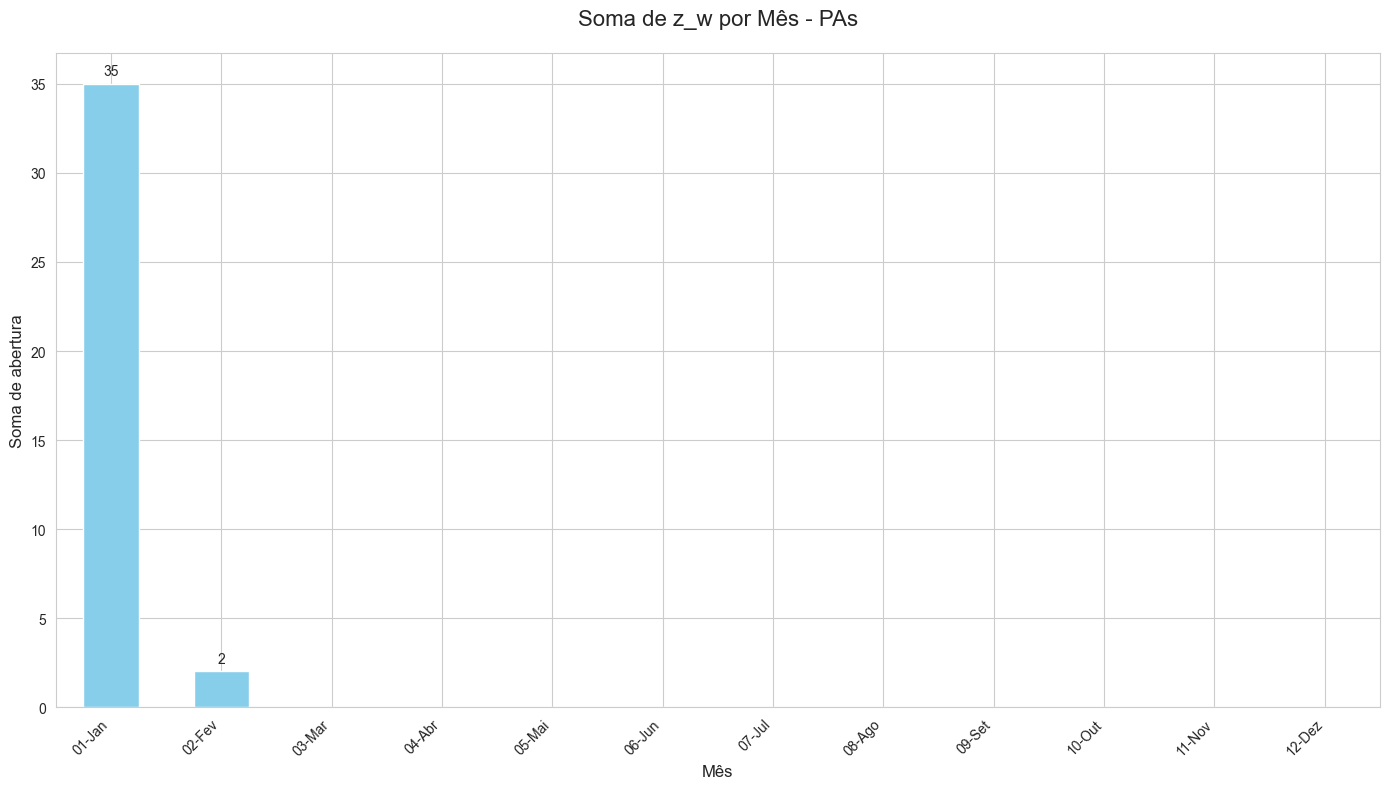

In [75]:
df_pa = df.loc[df['Ref'] == 'PA']

# Agrupar por mês ('Mes') e calcular a soma da coluna 'z_w' para cada mês
monthly_data = df_pa[['Mes', 'Origem', 'z_w']].drop_duplicates().groupby(['Mes'])['z_w'].sum()

# Supondo que 'df' seja o seu DataFrame carregado

df_pa = df.loc[df['Ref'] == 'PA']

# Agrupar por mês ('Mes') e calcular a soma da coluna 'z_w' para cada mês
monthly_data = df_pa[['Mes', 'Origem', 'z_w']].drop_duplicates().groupby(['Mes'])['z_w'].sum()

# Criar a figura e os eixos do gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plotar o gráfico de barras
ax = monthly_data.plot(kind='bar', color='skyblue')

# Adicionar rótulos de dados
for p in ax.patches:
    if p.get_height() > 0:
        # Adiciona o rótulo acima da barra
        ax.annotate(f'{p.get_height():.0f}',  # Formata o valor (opcional: .2f para 2 casas decimais)
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # Deslocamento vertical do texto (ajuste conforme necessário)
                textcoords='offset points')

# Definir o título do gráfico, rótulos dos eixos e outras configurações
plt.title('Soma de z_w por Mês - PAs', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Soma de abertura', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# Exibir o gráfico
plt.show()

In [76]:
df_plot = df.loc[df['Ref']!='Fabrica', ['Ref', 'Origem', 'lat_origem', 'lon_origem', 'uf_origem', 'cid_origem', 'z_w']].drop_duplicates()
df_plot = df_plot.reset_index(drop=True)
df_cidades = pd.read_csv(rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Dados Gerados Mestrado\Auxiliar\df_cluster_pa_cities.csv',\
                          encoding='utf-8', sep=',', )
df_cidades = df_cidades.loc[~df_cidades['nome_cidade'].isin(df_plot['cid_origem'].unique()), :].drop_duplicates().reset_index(drop=True)
df_cidades = df_cidades.rename(columns={'nome_cidade': 'cid_origem', 'latitude_cidade': 'lat_origem', 'longitude_cidade': 'lon_origem'})

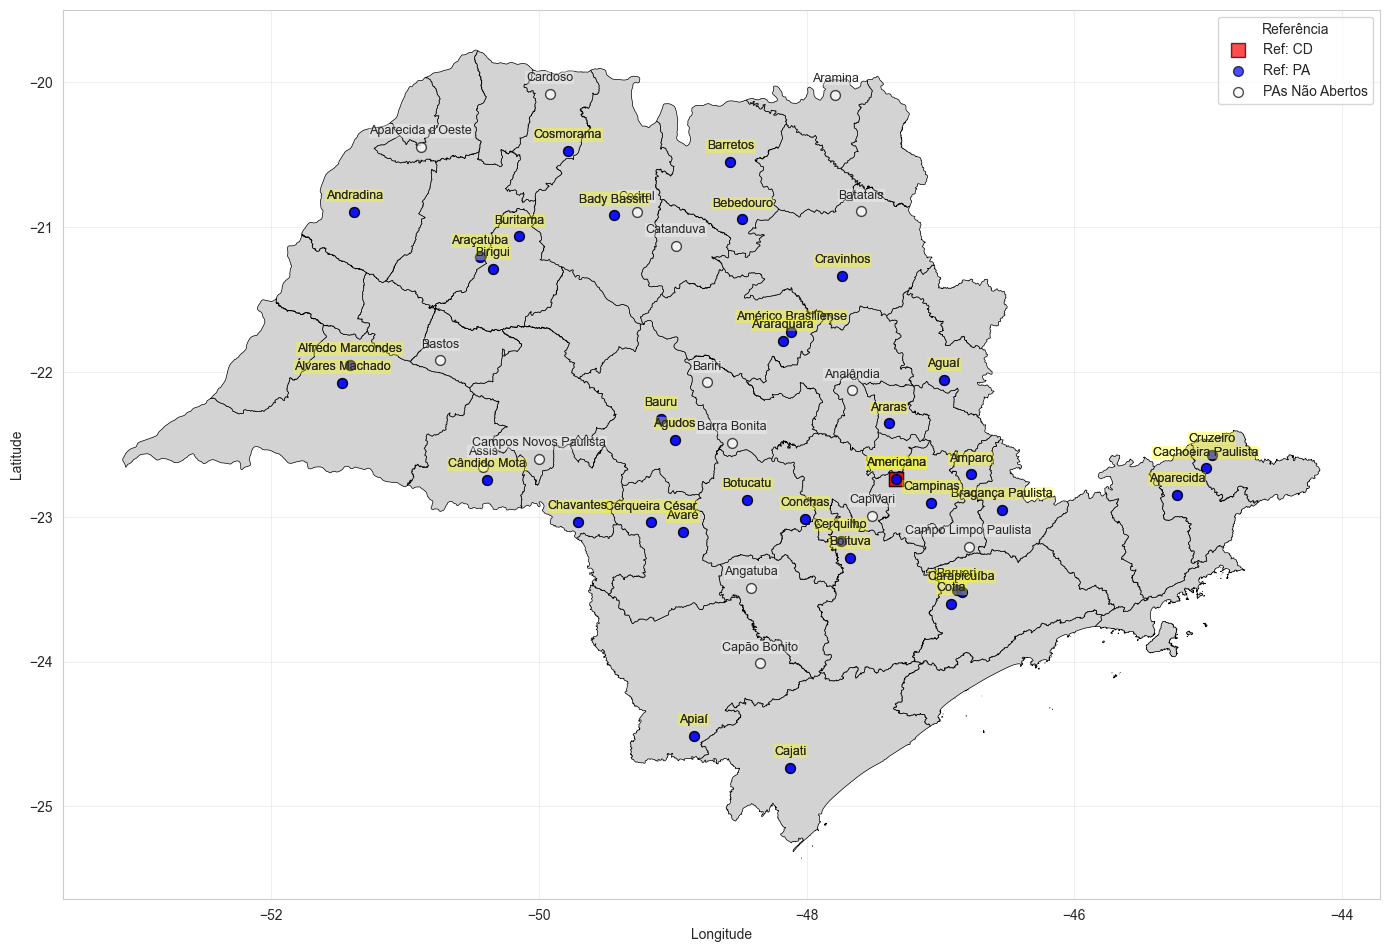

In [77]:
import matplotlib.pyplot as plt

def plotar_grafico(df, df_cidades):
    # Configurações de estilo
    ref_config = {
        'CD': {'color': 'red', 'marker': 's', 'size': 100, 'label_color': 'yellow'},
        'PA': {'color': 'blue', 'marker': 'o', 'size': 50, 'label_color': 'yellow'},
        # Padrão para Refs não especificadas
        'default': {'color': 'gray', 'marker': 'o', 'size': 50, 'label_color': 'yellow'}
    }
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Lista para armazenar handles da legenda
    legend_handles = []
    
    def plot_group(data, is_city=False):
        for ref, group in data.groupby('Ref' if not is_city else 'cid_origem'):
            config = ref_config.get(ref, ref_config['default']) if not is_city else {
                'color': 'white',
                'marker': 'o',
                'size': 50,
                'label_color': 'white'
            }
            
            # Criar scatter plot com label para legenda
            if not is_city:
                scatter = plt.scatter(
                    group['lon_origem'], 
                    group['lat_origem'],
                    c=config['color'],
                    marker=config['marker'],
                    s=config['size'],
                    edgecolor='black',
                    label=f'Ref: {ref}',
                    alpha=0.7
                )
                legend_handles.append(scatter)
            else:
                plt.scatter(
                    group['lon_origem'], 
                    group['lat_origem'],
                    c=config['color'],
                    marker=config['marker'],
                    s=config['size'],
                    edgecolor='black',
                    alpha=0.7
                )
            
            # Adicionar labels de texto
            for _, row in group.iterrows():
                plt.text(
                    row['lon_origem'],
                    row['lat_origem'] + 0.09,
                    row['cid_origem'],
                    fontsize=9,
                    ha='center',
                    bbox=dict(
                        facecolor=config['label_color'],
                        alpha=0.3 if is_city else 0.2,
                        edgecolor='none',
                        pad=0.5
                    )
                )
    
    # Plotar grupos
    plot_group(df_cidades, is_city=True)
    plot_group(df)
    
    # Adicionar entrada para cidades na legenda
    city_scatter = plt.scatter([], [], c='white', marker='o', s=50, 
                              edgecolor='black', label='PAs Não Abertos', alpha=0.7)
    legend_handles.append(city_scatter)
    
    # Configurações finais
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.title('CDs, PAs e PAs Não Abertos - Localização por Origem', fontsize=16, pad=20)
    
    # Criar legenda com os handles coletados
    plt.legend(handles=legend_handles, title='Referência', loc='best')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_grafico(df_plot, df_cidades)

In [78]:
print(sorted(list(df_cidades.loc[~df_cidades['cid_origem'].isin(df_plot['cid_origem'].unique()), 'cid_origem'].unique())))

['Analândia', 'Angatuba', "Aparecida d'Oeste", 'Aramina', 'Assis', 'Bariri', 'Barra Bonita', 'Bastos', 'Batatais', 'Campo Limpo Paulista', 'Campos Novos Paulista', 'Capivari', 'Capão Bonito', 'Cardoso', 'Catanduva', 'Cedral']


In [79]:
print(sorted(list(df_plot['cid_origem'].unique())))

['Aguaí', 'Agudos', 'Alfredo Marcondes', 'Americana', 'Amparo', 'Américo Brasiliense', 'Andradina', 'Aparecida', 'Apiaí', 'Araraquara', 'Araras', 'Araçatuba', 'Avaré', 'Bady Bassitt', 'Barretos', 'Barueri', 'Bauru', 'Bebedouro', 'Birigui', 'Boituva', 'Botucatu', 'Bragança Paulista', 'Buritama', 'Cachoeira Paulista', 'Cajati', 'Campinas', 'Carapicuíba', 'Cerqueira César', 'Cerquilho', 'Chavantes', 'Conchas', 'Cosmorama', 'Cotia', 'Cravinhos', 'Cruzeiro', 'Cândido Mota', 'Álvares Machado']


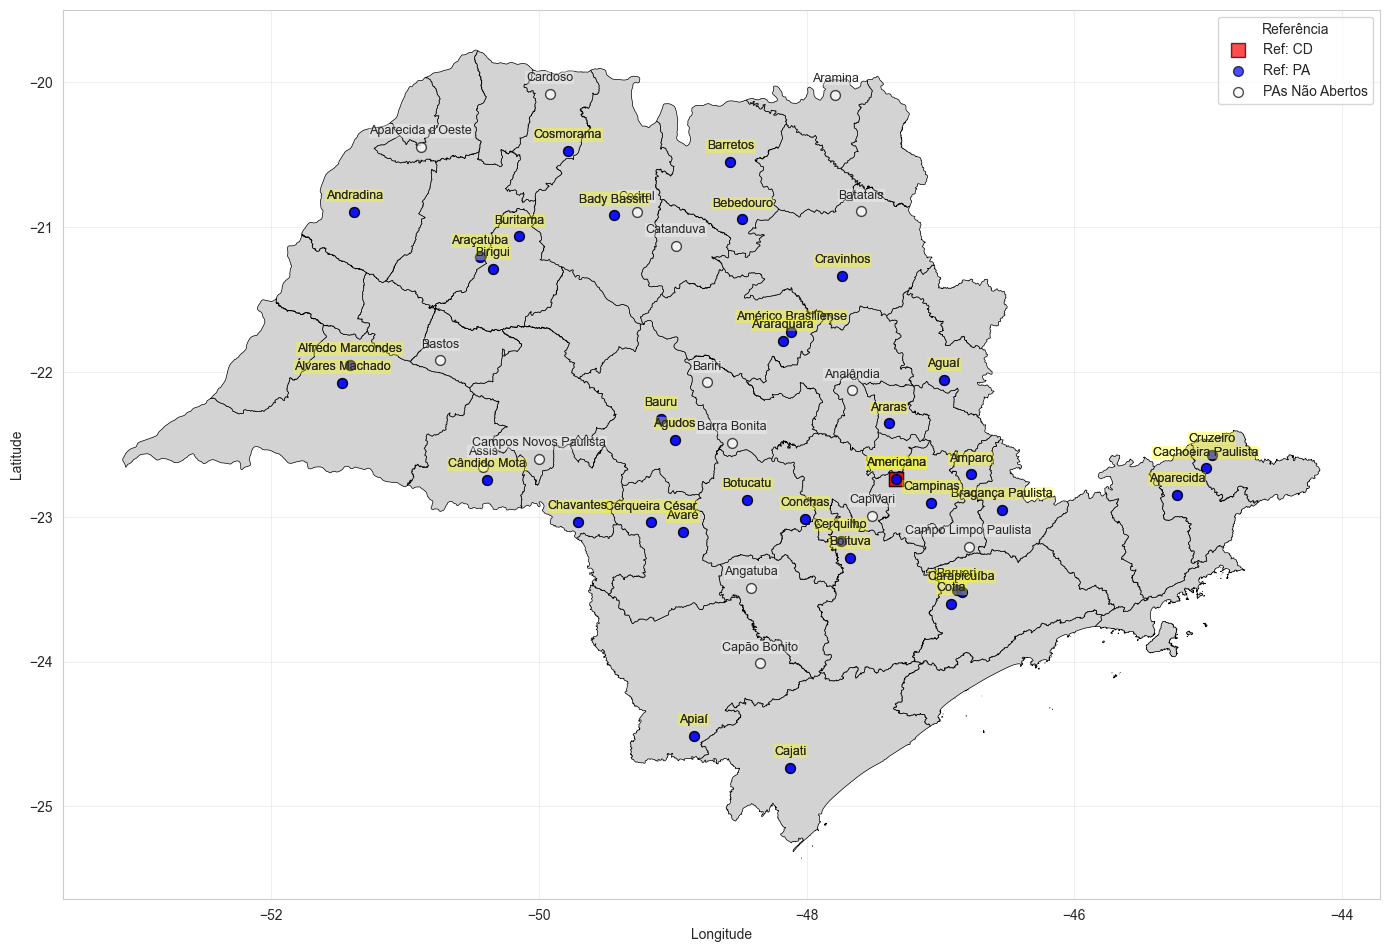

In [80]:
plotar_grafico(df_plot, df_cidades)

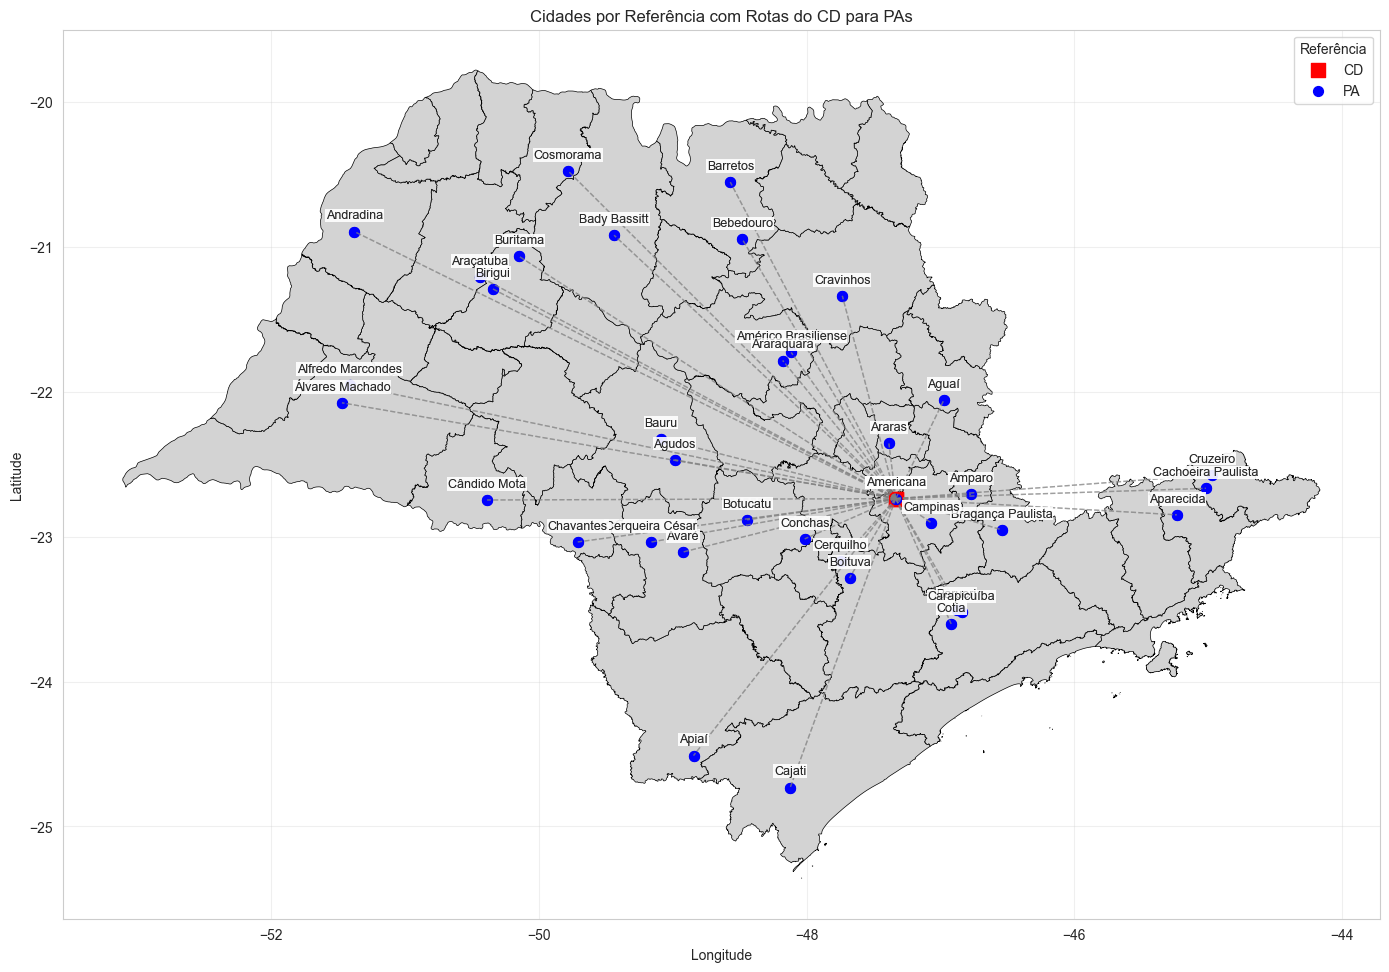

In [81]:
def plotar_grafico_traço(df):
    # Dicionário de cores para cada Ref
    ref_cores = {
        'CD': 'red',
        'PA': 'blue',
        # Adicione outras Refs e cores conforme necessário
    }
    
    # Dicionário de marcadores para cada Ref
    ref_markers = {
        'CD': 's',  # quadrado
        'PA': 'o',  # círculo
        # Adicione outros marcadores conforme necessário
    }

    ref_size = {
        'CD': 100,
        'PA': 50,
        # Adicione outros tamanhos conforme necessário
    }
    
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Encontrar as coordenadas do CD
    cd_data = df[df['Ref'] == 'CD']
    if not cd_data.empty:
        cd_lon = cd_data['lon_origem'].iloc[0]
        cd_lat = cd_data['lat_origem'].iloc[0]
    
    # Plotar cada grupo separadamente
    for ref, group in df.groupby('Ref'):
        scatter = plt.scatter(
            group['lon_origem'], 
            group['lat_origem'],
            c=ref_cores.get(ref, 'gray'),
            marker=ref_markers.get(ref, 'o'),
            s=ref_size.get(ref, 50),
            label=ref
        )
        
        # Adicionar rótulos das cidades
        for _, row in group.iterrows():
            plt.text(
                row['lon_origem'], 
                row['lat_origem'] + 0.09,  # Ajuste vertical para evitar sobreposição
                row['cid_origem'],          # Nome da cidade
                fontsize=9,                 # Tamanho da fonte
                ha='center',                 # Alinhamento horizontal
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.5)
            )
            
            # Desenhar linhas do CD para os PAs
            if ref == 'PA' and not cd_data.empty:
                plt.plot(
                    [cd_lon, row['lon_origem']],
                    [cd_lat, row['lat_origem']],
                    color='gray',
                    linestyle='--',
                    linewidth=1,
                    alpha=0.5
                )
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Cidades por Referência com Rotas do CD para PAs')
    plt.legend(title='Referência')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plotar_grafico_traço(df_plot)

In [82]:
df_info_zd = df_dist_ZD_PA.iloc[:,1:5].rename(columns={'latitude_cidade': 'lat_zd', 'longitude_cidade': 'lon_zd'})
df_teste = df.loc[(df['Origem'].str.startswith('PA')) & (df['Destino'].str.startswith('ZD')) &
                (df['b_rota']==1), ['Origem', 'Destino', 'lat_origem', 'lon_origem']].drop_duplicates().reset_index(drop=True)
df_teste = pd.merge(df_teste, df_info_zd, left_on='Destino', right_on='ZD', how='left')

In [83]:
df_teste = pd.merge(df_teste, df_plot.loc[:, ['Origem', 'cid_origem']], left_on='Origem', right_on='Origem', how='left')

In [84]:
df_teste.head()

,Origem,Destino,lat_origem,lon_origem,nome_cidade,lat_zd,lon_zd,ZD,cid_origem
0,PA_0001,ZD_0001,-22.0572,-46.9735,Aguaí,-22.0572,-46.9735,ZD_0001,Aguaí
1,PA_0001,ZD_0001,-22.0572,-46.9735,Aguaí,-22.0572,-46.9735,ZD_0001,Aguaí
2,PA_0002,ZD_0002,-22.4694,-48.9863,Agudos,-22.4694,-48.9863,ZD_0002,Agudos
3,PA_0002,ZD_0002,-22.4694,-48.9863,Agudos,-22.4694,-48.9863,ZD_0002,Agudos
4,PA_0002,ZD_0044,-22.4694,-48.9863,Campos Novos Paulista,-22.6020,-49.9987,ZD_0044,Agudos


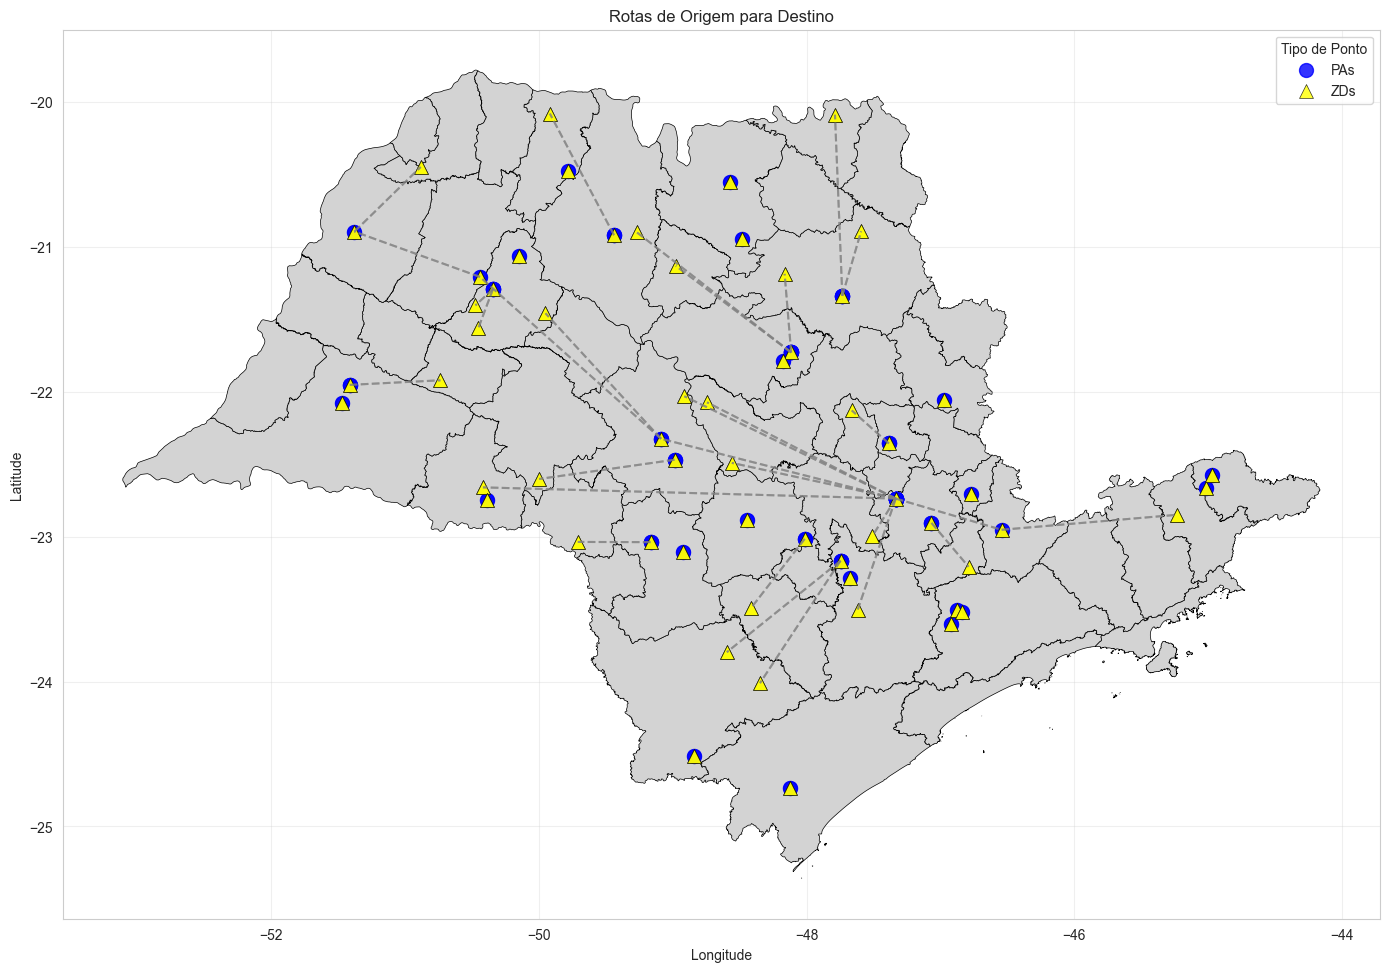

In [85]:
def plotar_grafico_traço(df):
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Plotar pontos de Origem (círculo azul)
    scatter_origem = plt.scatter(
        df['lon_origem'], 
        df['lat_origem'],
        c='blue',
        marker='o',
        s=100,
        label="PAs",
        alpha=0.8
    )
    
    # Plotar pontos de Destino (triângulo amarelo)
    scatter_destino = plt.scatter(
        df['lon_zd'], 
        df['lat_zd'],
        c='yellow',
        marker='^',
        s=100,
        label='ZDs',
        alpha=0.8,
        edgecolors='black',
        linewidth=0.5
    )
    
    # # Adicionar rótulos das origens (Origem + nome_cidade)
    # for _, row in df.iterrows():
    #     plt.text(
    #         row['lon_origem'], 
    #         row['lat_origem'] + 0.09,
    #         f"{row['Origem']}", # f"{row['Origem']} - {row['nome_cidade']}",
    #         fontsize=9,
    #         ha='center',
    #         bbox=dict(facecolor='lightblue', alpha=0.7, edgecolor='none', pad=0.5)
    #     )
    
    # # Adicionar rótulos dos destinos (Destino + cid_origem)
    # for _, row in df.iterrows():
    #     plt.text(
    #         row['lon_zd'], 
    #         row['lat_zd'] + 0.09,
    #         f"{row['Destino']}", # f"{row['Destino']} - {row['cid_origem']}"
    #         fontsize=9,
    #         ha='center',
    #         bbox=dict(facecolor='lightyellow', alpha=0.7, edgecolor='none', pad=0.5)
    #     )
    
    # Desenhar linhas tracejadas de origem para destino
    for _, row in df.iterrows():
        plt.plot(
            [row['lon_origem'], row['lon_zd']],
            [row['lat_origem'], row['lat_zd']],
            color='gray',
            linestyle='--',
            linewidth=1.5,
            alpha=0.6
        )
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Rotas de Origem para Destino')
    plt.legend(title='Tipo de Ponto')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_grafico_traço(df_teste)

In [86]:
df.loc[(df['Ref'] == 'PA') &
       (df['Abrv Var'] == 'qaj')].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Abrv Var'])['Valor'].sum().sort_values(ascending=False)

Ref  Origem   uf_origem  cid_origem           Abrv Var
PA   PA_0036  SP         Campinas             qaj         46094.0
     PA_0005  SP         Americana            qaj         40185.0
     PA_0042  SP         Carapicuíba          qaj         17859.0
     PA_0024  SP         Barueri              qaj         11915.0
     PA_0051  SP         Cotia                qaj         11062.0
     PA_0016  SP         Araraquara           qaj          8248.0
     PA_0027  SP         Bauru                qaj          7347.0
     PA_0006  SP         Américo Brasiliense  qaj          7164.0
     PA_0052  SP         Cravinhos            qaj          5692.0
     PA_0017  SP         Araras               qaj          5176.0
     PA_0029  SP         Birigui              qaj          4886.0
     PA_0019  SP         Avaré                qaj          4138.0
     PA_0023  SP         Barretos             qaj          3985.0
     PA_0047  SP         Cerquilho            qaj          3887.0
     PA_0031  SP     

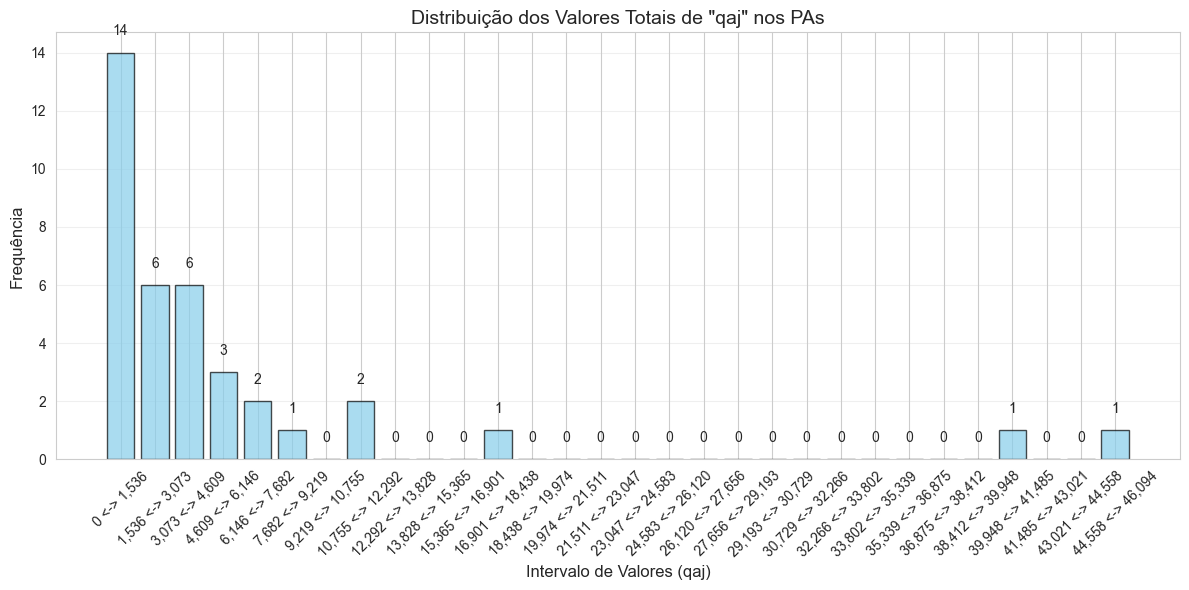

In [87]:
# Filtrar e preparar os dados (como antes)
dados_pa_qaj = df.loc[
    (df['Ref'] == 'PA') & 
    (df['Abrv Var'] == 'qaj')
].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Abrv Var'])['Valor'].sum().sort_values(ascending=False)

df_hist = dados_pa_qaj.reset_index()

# Criar bins (intervalos) manualmente para controle
valores = df_hist['Valor']
bins = 30  # Número de barras
hist, bin_edges = np.histogram(valores, bins=bins)

# Definir posições das barras com espaçamento
largura_barra = (bin_edges[1] - bin_edges[0]) * 0.8  # 80% da largura original
posicoes = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) * 0.1  # Centralizar + espaço

# Plotar as barras
plt.figure(figsize=(12, 6))
barras = plt.bar(
    posicoes, 
    hist, 
    width=largura_barra, 
    color='skyblue', 
    edgecolor='black',
    alpha=0.7
)

# Adicionar rótulos em cada barra
for barra, valor in zip(barras, hist):
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # Posição X (centro da barra)
        altura + 0.5,                            # Posição Y (acima da barra)
        f'{int(valor)}',                         # Texto (valor)
        ha='center',                             # Alinhamento horizontal
        va='bottom',                             # Alinhamento vertical
        fontsize=10
    )

# Ajustar eixos e título
plt.xlabel('Intervalo de Valores (qaj)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Valores Totais de "qaj" nos PAs', fontsize=14)
plt.xticks(posicoes, [f'{bin_edges[i]:,.0f} <-> {bin_edges[i+1]:,.0f}' for i in range(bins)], rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [88]:
df.loc[(df['Ref'] == 'CD') & (df['Destino'] == 'PA_0056')].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes', 'Abrv Var'])['Valor'].\
    sum().unstack(level='Mes').applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\1107061188.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sum().unstack(level='Mes').applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


,,,,,Mes
Ref,Origem,uf_origem,cid_origem,Origem,Abrv Var


In [89]:
df.loc[df['Origem'] == 'PA_0066'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\3642971027.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


,,,,Mes
Ref,Origem,uf_origem,cid_origem,Abrv Var


In [90]:
df.loc[df['Origem'] == 'PA_0032'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\1091802412.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                              01-Jan 02-Fev 03-Mar 04-Abr  \
Ref Origem  uf_origem cid_origem        Abrv Var                               
PA  PA_0032 SP        Bragança Paulista qaj          75    116     22     76   
                                        qrc           0      0      0      0   
                                        qrp          65    101     19     66   
                                        sp        3,675  3,716  3,714  3,704   
                                        spbj      1,825  1,766  1,744  1,668   
                                        sprc      1,850  1,951  1,970  2,036   

Mes                                              05-Mai 06-Jun 07-Jul 08-Ago  \
Ref Origem  uf_origem cid_origem        Abrv Var                               
PA  PA_0032 SP        Bragança Paulista qaj          36     88     99     40   
                                        qrc           0      0      0      0   
                                        qrp          31     76     86     34   
                                        sp        3,698  3,686  3,674  3,668   
                                        spbj      1,632  1,544  1,444  1,404   
                                        sprc      2,067  2,143  2,229  2,263   

Mes                                              09-Set 10-Out 11-Nov 12-Dez  
Ref Origem  uf_origem cid_origem        Abrv Var                              
PA  PA_0032 SP        Bragança Paulista qaj          98    103    131    160  
                                        qrc           0      0      0      0  
                                        qrp          85     89    113    138  
                                        sp        3,654  3,640  3,622  3,600  
                                        spbj      1,307  1,204  1,072    912  
                                        sprc      2,348  2,437  2,550  2,688